# **Forecasting - Airlines Data**

In [121]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import lag_plot

In [122]:
# Read Airlines Data file
df_airlines = pd.read_excel('Airlines_Data.xlsx', index_col='Month', parse_dates=True)
df_airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


## **Exploratory Data Analysis (EDA)**

In [123]:
df_airlines.shape

(96, 1)

In [124]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


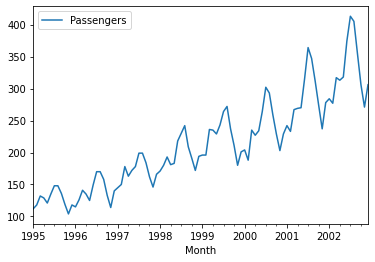

In [125]:
# line plot to check the variations of passengers
df_airlines.plot()

Observation: Positive trend. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f764e07db10>]],
      dtype=object)

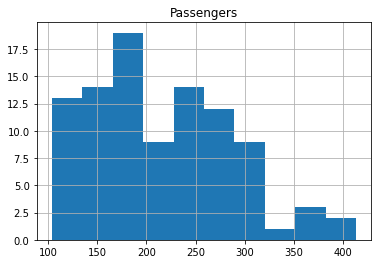

In [126]:
# Histogram
df_airlines.hist()

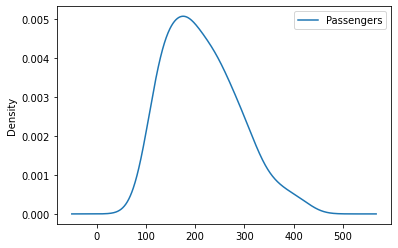

In [127]:
# Density Plot
df_airlines.plot(kind='kde')

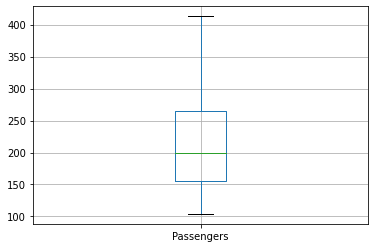

In [128]:
# Box plot
df_airlines.boxplot()

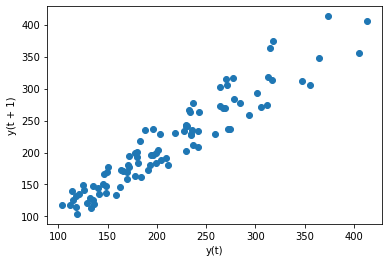

In [129]:
# lagplot
lag_plot(df_airlines)

In [130]:
# Create a new column t with serial numbers to use in model based forecasting
df_airlines['t'] = range(1, 1 + len(df_airlines['Passengers']))
df_airlines.head()

,Passengers,t
Month,,
1995-01-01,112,1
1995-02-01,118,2
1995-03-01,132,3
1995-04-01,129,4
1995-05-01,121,5


In [131]:
df_airlines.tail()

,Passengers,t
Month,,
2002-08-01,405,92
2002-09-01,355,93
2002-10-01,306,94
2002-11-01,271,95
2002-12-01,306,96


In [132]:
# Add t square column and log of passengers column
df_airlines['log_passengers'] = np.log10(df_airlines['Passengers'])
df_airlines['t_square'] = np.square(df_airlines['t'])
df_airlines.head()

,Passengers,t,log_passengers,t_square
Month,,,,
1995-01-01,112,1,2.049218,1
1995-02-01,118,2,2.071882,4
1995-03-01,132,3,2.120574,9
1995-04-01,129,4,2.110590,16
1995-05-01,121,5,2.082785,25


In [133]:
# Separate Month and Year into separate columns to process for seasonality calculations
df_airlines['year'], df_airlines['month_only'] = df_airlines.index.year, df_airlines.index.month
df_airlines.head() 

,Passengers,t,log_passengers,t_square,year,month_only
Month,,,,,,
1995-01-01,112,1,2.049218,1,1995,1
1995-02-01,118,2,2.071882,4,1995,2
1995-03-01,132,3,2.120574,9,1995,3
1995-04-01,129,4,2.110590,16,1995,4
1995-05-01,121,5,2.082785,25,1995,5


In [134]:
# Create dummy columns for individual months
df_temp = pd.get_dummies(df_airlines['month_only'])
df_temp.head()

,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1995-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,0,0,0,0,1,0,0,0,0,0,0,0


In [135]:
df_temp.columns = ['jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec']
df_temp.head()

,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,
1995-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,0,0,0,0,1,0,0,0,0,0,0,0


In [136]:
# Concatenate datasets
df_airlines = pd.concat([df_airlines, df_temp], axis=1)
df_airlines.head()

,Passengers,t,log_passengers,t_square,year,month_only,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,,,,,,,
1995-01-01,112,1,2.049218,1,1995,1,1,0,0,0,0,0,0,0,0,0,0,0
1995-02-01,118,2,2.071882,4,1995,2,0,1,0,0,0,0,0,0,0,0,0,0
1995-03-01,132,3,2.120574,9,1995,3,0,0,1,0,0,0,0,0,0,0,0,0
1995-04-01,129,4,2.110590,16,1995,4,0,0,0,1,0,0,0,0,0,0,0,0
1995-05-01,121,5,2.082785,25,1995,5,0,0,0,0,1,0,0,0,0,0,0,0


In [137]:
# Split the data into train and test datasets
df_airlines_train = df_airlines.iloc[0:84,:]
df_airlines_test = df_airlines.iloc[84:, :]
print(df_airlines_train.shape)
print(df_airlines_test.shape)

(84, 18)
(12, 18)


In [138]:
df_airlines_test.head(12)

,Passengers,t,log_passengers,t_square,year,month_only,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,,,,,,,
2002-01-01,284,85,2.453318,7225,2002,1,1,0,0,0,0,0,0,0,0,0,0,0
2002-02-01,277,86,2.442480,7396,2002,2,0,1,0,0,0,0,0,0,0,0,0,0
2002-03-01,317,87,2.501059,7569,2002,3,0,0,1,0,0,0,0,0,0,0,0,0
2002-04-01,313,88,2.495544,7744,2002,4,0,0,0,1,0,0,0,0,0,0,0,0
2002-05-01,318,89,2.502427,7921,2002,5,0,0,0,0,1,0,0,0,0,0,0,0
2002-06-01,374,90,2.572872,8100,2002,6,0,0,0,0,0,1,0,0,0,0,0,0
2002-07-01,413,91,2.615950,8281,2002,7,0,0,0,0,0,0,1,0,0,0,0,0
2002-08-01,405,92,2.607455,8464,2002,8,0,0,0,0,0,0,0,1,0,0,0,0
2002-09-01,355,93,2.550228,8649,2002,9,0,0,0,0,0,0,0,0,1,0,0,0


## **Model Based Forecasting**

### **Linear Regression Model**

In [139]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers ~ t', data=df_airlines).fit()

pred_linear = linear_model.predict(df_airlines_test['t'])
pred_linear.head()

Month
2002-01-01    298.925337
2002-02-01    301.260049
2002-03-01    303.594762
2002-04-01    305.929474
2002-05-01    308.264187
dtype: float64

In [140]:
df_airlines_test.head()

,Passengers,t,log_passengers,t_square,year,month_only,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,,,,,,,
2002-01-01,284,85,2.453318,7225,2002,1,1,0,0,0,0,0,0,0,0,0,0,0
2002-02-01,277,86,2.442480,7396,2002,2,0,1,0,0,0,0,0,0,0,0,0,0
2002-03-01,317,87,2.501059,7569,2002,3,0,0,1,0,0,0,0,0,0,0,0,0
2002-04-01,313,88,2.495544,7744,2002,4,0,0,0,1,0,0,0,0,0,0,0,0
2002-05-01,318,89,2.502427,7921,2002,5,0,0,0,0,1,0,0,0,0,0,0,0


In [141]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error as mse
rmse_linear = mse(df_airlines_test['Passengers'], pred_linear, squared=False)
print('rmse_linear: ', rmse_linear)

rmse_linear:  48.12175169738231


### **Exponential Model**

In [142]:
import statsmodels.formula.api as smf
exp_model = smf.ols('log_passengers ~ t', data=df_airlines).fit()

pred_exp = exp_model.predict(df_airlines_test['t'])
pred_exp.head()

Month
2002-01-01    2.482582
2002-02-01    2.487425
2002-03-01    2.492268
2002-04-01    2.497111
2002-05-01    2.501954
dtype: float64

In [143]:
df_airlines_test.head()

,Passengers,t,log_passengers,t_square,year,month_only,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,,,,,,,
2002-01-01,284,85,2.453318,7225,2002,1,1,0,0,0,0,0,0,0,0,0,0,0
2002-02-01,277,86,2.442480,7396,2002,2,0,1,0,0,0,0,0,0,0,0,0,0
2002-03-01,317,87,2.501059,7569,2002,3,0,0,1,0,0,0,0,0,0,0,0,0
2002-04-01,313,88,2.495544,7744,2002,4,0,0,0,1,0,0,0,0,0,0,0,0
2002-05-01,318,89,2.502427,7921,2002,5,0,0,0,0,1,0,0,0,0,0,0,0


In [144]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error as mse
rmse_exp = mse(df_airlines_test['log_passengers'], pred_exp, squared=False)
print('rmse_exp: ', rmse_exp)

rmse_exp:  0.05850632659670874


### **Quadratic Model**

In [145]:
quad_model = smf.ols('Passengers ~ t + t_square', data=df_airlines_train).fit()

pred_quad = quad_model.predict(df_airlines_test[['t', 't_square']])
pred_quad.head()

Month
2002-01-01    296.926546
2002-02-01    299.669959
2002-03-01    302.427336
2002-04-01    305.198678
2002-05-01    307.983986
dtype: float64

In [146]:
df_airlines_test.head()

,Passengers,t,log_passengers,t_square,year,month_only,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,,,,,,,
2002-01-01,284,85,2.453318,7225,2002,1,1,0,0,0,0,0,0,0,0,0,0,0
2002-02-01,277,86,2.442480,7396,2002,2,0,1,0,0,0,0,0,0,0,0,0,0
2002-03-01,317,87,2.501059,7569,2002,3,0,0,1,0,0,0,0,0,0,0,0,0
2002-04-01,313,88,2.495544,7744,2002,4,0,0,0,1,0,0,0,0,0,0,0,0
2002-05-01,318,89,2.502427,7921,2002,5,0,0,0,0,1,0,0,0,0,0,0,0


In [147]:
# Calculate RMSE
rmse_quad = mse(df_airlines_test['Passengers'], pred_quad, squared=False)
print('rmse_quad: ', rmse_quad)

rmse_quad:  48.05188897933164


### **Additive Seasonality Model**

In [148]:
add_sea_model = smf.ols('Passengers ~ jan+feb+mar+apr+may+june+july+aug+sep+oct+nov+dec', data=df_airlines_train).fit()

pred_add_sea = add_sea_model.predict(df_airlines_test[['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']])
pred_add_sea.head()

Month
2002-01-01    169.285714
2002-02-01    170.142857
2002-03-01    197.428571
2002-04-01    191.285714
2002-05-01    190.571429
dtype: float64

In [149]:
df_airlines_test.head()

,Passengers,t,log_passengers,t_square,year,month_only,jan,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
Month,,,,,,,,,,,,,,,,,,
2002-01-01,284,85,2.453318,7225,2002,1,1,0,0,0,0,0,0,0,0,0,0,0
2002-02-01,277,86,2.442480,7396,2002,2,0,1,0,0,0,0,0,0,0,0,0,0
2002-03-01,317,87,2.501059,7569,2002,3,0,0,1,0,0,0,0,0,0,0,0,0
2002-04-01,313,88,2.495544,7744,2002,4,0,0,0,1,0,0,0,0,0,0,0,0
2002-05-01,318,89,2.502427,7921,2002,5,0,0,0,0,1,0,0,0,0,0,0,0


In [150]:
# Calculate RMSE
rmse_add_sea = mse(df_airlines_test['Passengers'], pred_add_sea, squared=False)
print('rmse_add_sea: ', rmse_add_sea)

rmse_add_sea:  132.81978481421817


### **Additive Seasonality Quadratic**

In [151]:
add_sea_quad_model = smf.ols('Passengers ~ t+t_square+jan+feb+mar+apr+may+june+july+aug+sep+oct+nov+dec', data=df_airlines_train).fit()

pred_add_sea_quad = add_sea_quad_model.predict(df_airlines_test[['t','t_square','jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']])
pred_add_sea_quad.head()

Month
2002-01-01    282.098895
2002-02-01    283.691568
2002-03-01    311.712813
2002-04-01    306.305487
2002-05-01    306.326732
dtype: float64

In [152]:
# Calculate RMSE
rmse_add_sea_quad = mse(df_airlines_test['Passengers'], pred_add_sea_quad, squared=False)
print('rmse_add_sea_quad: ', rmse_add_sea_quad)

rmse_add_sea_quad:  26.360817612095907


### **Mulitplicative Seasonality**

In [153]:
mult_sea_model = smf.ols('log_passengers ~ jan+feb+mar+apr+may+june+july+aug+sep+oct+nov+dec', data=df_airlines_train).fit()

pred_mult_sea = mult_sea_model.predict(df_airlines_test[['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']])
pred_mult_sea.head()

Month
2002-01-01    2.212855
2002-02-01    2.219627
2002-03-01    2.282323
2002-04-01    2.266805
2002-05-01    2.262584
dtype: float64

In [154]:
# Calculate RMSE
rmse_mult_sea = mse(df_airlines_test['log_passengers'], pred_mult_sea, squared=False)
print('rmse_mult_sea: ', rmse_mult_sea)

rmse_mult_sea:  0.23613501431164274


### **Mulitplicative Additive Seasonality**

In [155]:
mult_add_sea_model = smf.ols('log_passengers ~ t+t_square+jan+feb+mar+apr+may+june+july+aug+sep+oct+nov+dec', data=df_airlines_train).fit()

pred_mult_add_sea = mult_add_sea_model.predict(df_airlines_test[['t','t_square','jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']])
pred_mult_add_sea.head()

Month
2002-01-01    2.435102
2002-02-01    2.441001
2002-03-01    2.502825
2002-04-01    2.486435
2002-05-01    2.481342
dtype: float64

In [156]:
# Calculate RMSE
rmse_mult_add_sea = mse(df_airlines_test['log_passengers'], pred_mult_sea, squared=False)
print('rmse_mult_add_sea: ', rmse_mult_add_sea)

rmse_mult_add_sea:  0.23613501431164274


### **Comparing above results**

In [157]:
data = {'Model':['RMSE_Lin', 'RMSE_Exp', 'RMSE_Quad', 'RMSE_Add_Sea', 'RMSE_Add_Sea_Quad', 'RMSE_mult_sea', 'RMSE_mult_add_sea'],
        'RMSE_Value' : [rmse_linear, rmse_exp, rmse_quad, rmse_add_sea, rmse_add_sea_quad, rmse_mult_sea, rmse_mult_add_sea]}

df_rmse = pd.DataFrame(data)
df_rmse

,Model,RMSE_Value
0,RMSE_Lin,48.121752
1,RMSE_Exp,0.058506
2,RMSE_Quad,48.051889
3,RMSE_Add_Sea,132.819785
4,RMSE_Add_Sea_Quad,26.360818
5,RMSE_mult_sea,0.236135
6,RMSE_mult_add_sea,0.236135


Observation: RMSE value is least for Exponential Model. Hence this model best suits for this Airlines data.

### **Final Model Creation for Forecasting of Airlines Prices**

In [158]:
final_model = smf.ols('log_passengers ~ t', data = df_airlines).fit()
pred_final = final_model.predict(df_airlines['t'])
pred_final.head()

Month
1995-01-01    2.075763
1995-02-01    2.080606
1995-03-01    2.085449
1995-04-01    2.090292
1995-05-01    2.095135
dtype: float64

In [159]:
# Calculate RMSE
rmse_final = mse(df_airlines['log_passengers'], pred_final, squared=False)
print('rmse_final: ', rmse_final)

rmse_final:  0.054561423148798735


Observation: Final model for Airlines prices forecasting is created with 0.054 RMSE value.

## **Persistence/Base and Arima Models**

## **Persistence / Base Model**

In [160]:
# Read Airlines Data file
df_airlines = pd.read_excel('Airlines_Data.xlsx', index_col='Month', parse_dates=True)
df_airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [161]:
# Create Passengers-1 column
df_airlines['Passengers-1'] = df_airlines['Passengers'].shift(+1)
df_airlines.head()

,Passengers,Passengers-1
Month,,
1995-01-01,112,NaN
1995-02-01,118,112.0
1995-03-01,132,118.0
1995-04-01,129,132.0
1995-05-01,121,129.0


In [162]:
# Calculate RMSE value
rmse_base = mse(df_airlines.iloc[1:,0],df_airlines.iloc[1:,1], squared=False)
print('rmse_base: ', rmse_base)

rmse_base:  23.33328320796621


### **Arima Model**

In [163]:
# Create Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

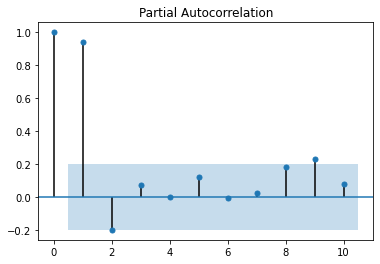

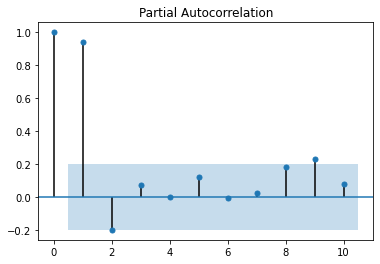

In [164]:
# Plot PACF to choose right p value for Arima order (Auto Regression)
plot_pacf(df_airlines['Passengers'], lags=10)

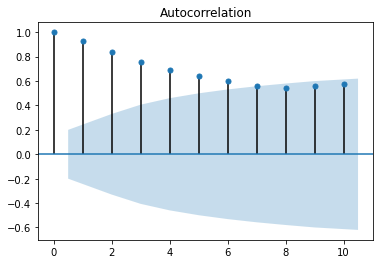

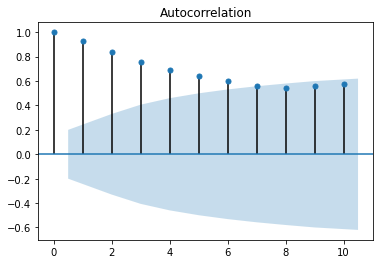

In [165]:
# Plot ACF to choose right q value for Arima order (Moving Average)
plot_acf(df_airlines['Passengers'], lags=10)

Observation: PACF Plot reduced exponentially at 2 to negative value and p value of 1 is out of range (blue background region), p value of 0 will be considered. 

ACF plot came with in range at 8. So, q value of 8 will be considered.

**Create Final Arima Model**

In [166]:
df_airlines.shape

(96, 2)

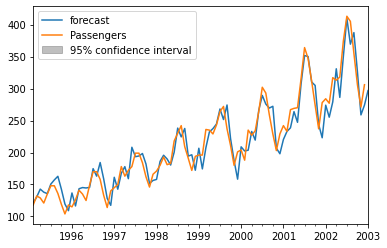

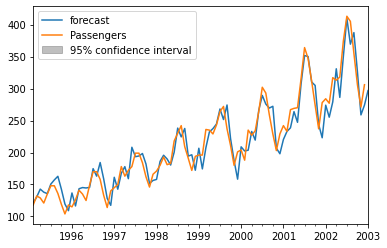

In [167]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_airlines['Passengers'], order=(0,0,8))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)[0]
pred_arima = model_fit.predict(start=1, end=96)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
model_fit.plot_predict(1,96)

In [168]:
pred_arima.shape

(96,)

In [169]:
# Calculate RMSE value
rmse_arima = mse(df_airlines['Passengers'], pred_arima, squared=False)
print('rmse_arima: ', rmse_arima)

rmse_arima:  17.693793535855143


Observation: Final Arima model for Airlines data was created with best RMSE value 17.69